In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import datasets
from sklearn.pipeline import Pipeline
from sklearn.base import clone

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [109]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1]**2))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1]**2))


# shrink original dataset (train 60k --> 20k (of just a few labels)) [only 4 classes]

train_images = train_images[np.isin(train_labels,[0,1,2,3])]
train_labels = train_labels[np.isin(train_labels,[0,1,2,3])]

test_images = test_images[np.isin(test_labels,[0,1,2,3])]
test_labels = test_labels[np.isin(test_labels,[0,1,2,3])]

In [111]:
rand_clf = RandomForestClassifier(n_estimators = 200, max_depth = 10, n_jobs = 4, random_state = 42)
rand_clf.fit(train_images, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [112]:
rand_clf.score(test_images, test_labels)   # baseline accuracy

0.94

In [145]:
log_clf = LogisticRegression()
log_clf.fit(train_images, train_labels)
log_clf.score(test_images, test_labels)

C:\Users\alexw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.923

In [146]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 8)), 
    ("rand", LogisticRegression()),
])
pipeline.fit(train_images, train_labels)

C:\Users\alexw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('rand',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [147]:
pipeline.score(test_images, test_labels)

0.88975

In [131]:
kmeans = KMeans(n_clusters = 8)
y_pred = kmeans.fit(train_images[0].reshape(28,28))

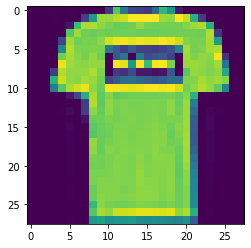

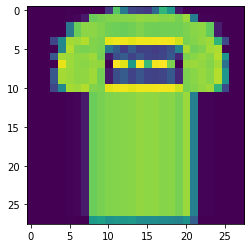

In [137]:
seg = kmeans.cluster_centers_[kmeans.labels_]
seg = seg.reshape(28,28)
plt.imshow(train_images[0].reshape(28,28))
plt.show()
plt.imshow(seg)

In [148]:
import glob

In [348]:
data = ["Age","Year","Positive","Survival"]

for file in glob.glob("./haberman-ssl20-10-fold/haberman-ssl20/*.dat"):
    with open(file) as f:
        reader = csv.reader(f, delimiter = '\t')
#         print(file)
        for line in reader:
            if "@" not in line[0]:
                data += (line[0].split(", "))
data = np.array(data).reshape(-1, 4)

In [349]:
df = pd.DataFrame(data = data[1:][:], columns = data[0][:], index = np.arange(0,data.shape[0] -1))

In [268]:
df["Age"] = df["Age"].astype(int)
df["Year"] = df["Year"].astype(int)
df["Positive"] = df["Year"].astype(int)

In [272]:
df["Survival"].unique()

array(['negative', 'positive', 'unlabeled'], dtype=object)

In [273]:
label_df = df[df["Survival"] != 'unlabeled']

In [350]:
df

,Age,Year,Positive,Survival
0,42,60,1,negative
1,56,65,9,positive
2,65,62,22,positive
3,41,64,0,positive
4,44,64,6,positive
...,...,...,...,...
5809,66,61,13,positive
5810,41,59,8,negative
5811,57,67,0,negative
5812,50,61,0,negative


In [353]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

df.iloc[:, :3] = scale.fit_transform(df.iloc[:, :3].values)

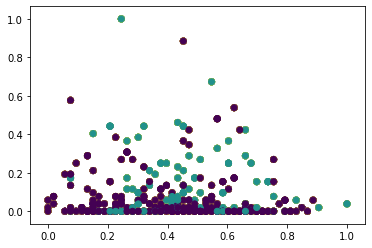

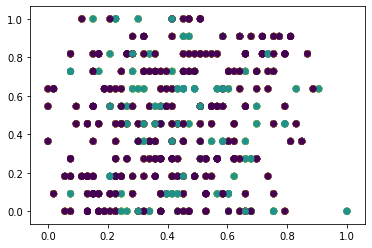

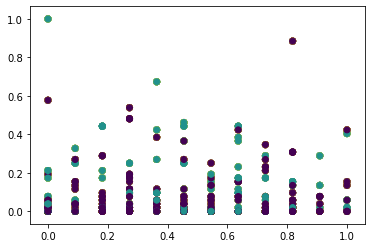

In [355]:
%matplotlib inline
c = pd.factorize(df["Survival"])[0]
c = c.astype(int)
plt.scatter(df["Age"], df["Positive"], c = c, label = df["Survival"])
plt.show()
plt.scatter(df["Age"], df["Year"], c = c, label = df["Survival"])
plt.show()
plt.scatter(df["Year"], df["Positive"], c = c, label = df["Survival"])
plt.show()

In [368]:
cluster_data = df[["Age" , "Year"]]
kmeans = KMeans(n_clusters = 2)
kmeans.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [369]:
d = kmeans.predict(cluster_data)

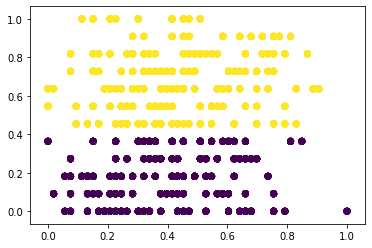

In [370]:
plt.scatter(cluster_data.iloc[:,0], cluster_data.iloc[:, 1], c = d)

In [387]:
from sklearn.datasets import load_iris
iris = load_iris()
labels = pd.factorize(iris["target"])[0]

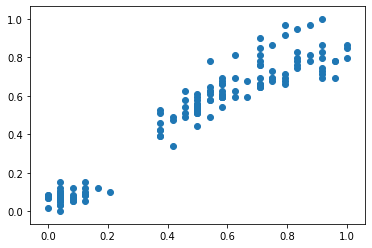

In [381]:
data = iris["data"]
data = scale.fit_transform(data)
plt.scatter(data[:, 3], data[:, 2])

In [382]:
d = data[:, 2:4]

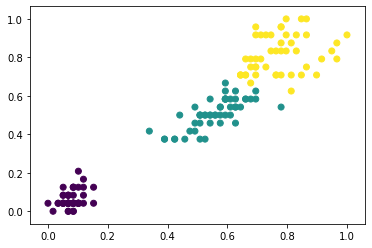

In [384]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(d)
pred = kmeans.predict(d)
plt.scatter(d[:, 0], d[:, 1], c = pred)              # kmeans prediction

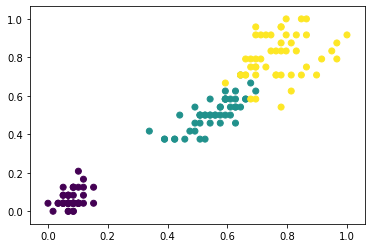

In [389]:
plt.scatter(d[:, 0], d[:, 1], c = labels)             # actual labels